In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as ppr
from fitter import Fitter

In [100]:
%matplotlib inline

In [101]:
# Lectura de los datos
df_Continent = pd.read_csv('../data\Continent_Consumption_TWH.csv')
df_Countries =  pd.read_csv('../data/Country_Consumption_TWH.csv')
df_non_renewable_total = pd.read_csv('../data/nonRenewablesTotalPowerGeneration.csv')
df_renewable_total = pd.read_csv('../data/renewablesTotalPowerGeneration.csv')
df_renewable_power_generation = pd.read_csv('../data/nonRenewablesTotalPowerGeneration.csv')
df_top_Countries = pd.read_csv('../data/top20CountriesPowerGeneration.csv')

In [102]:
df_Continent.head()

Year      World      OECD     BRICS    Europe  North America  \
0  1990  101855.54  52602.49  26621.07  20654.88       24667.23   
1  1991  102483.56  53207.25  26434.99  20631.62       24841.68   
2  1992  102588.23  53788.75  25993.05  20189.68       25341.77   
3  1993  103646.56  54614.48  26283.80  20189.68       25830.23   
4  1994  104449.03  55579.77  25993.05  20085.01       26365.21   

   Latin America      Asia  Pacific   Africa  Middle-East       CIS  
0        5373.06  24574.19  1197.89  4407.77      2581.86  16049.40  
1        5500.99  24783.53  1186.26  4535.70      2744.68  15898.21  
2        5628.92  25690.67  1209.52  4582.22      3081.95  14339.79  
3        5675.44  26876.93  1267.67  4721.78      3349.44  13246.57  
4        5989.45  28098.08  1279.30  4803.19      3640.19  11606.74

In [103]:
df_Continent['World'].describe()

count        31.000000
mean     132792.465484
std       22724.116555
min      101855.540000
25%      111176.985000
50%      133582.180000
75%      154853.450000
max      167553.410000
Name: World, dtype: float64

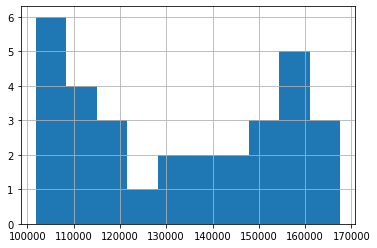

In [104]:
df_Continent['World'].hist()
plt.show()

In [105]:
count, bins = np.histogram(df_Continent['World'].values, bins=7)
segmentos = np.round(bins/1000,2)
segmentos

array([101.86, 111.24, 120.63, 130.01, 139.4 , 148.78, 158.17, 167.55])

In [106]:
df_continent_normal = df_Continent['World']/1000
df_continent_normal

0     101.85554
1     102.48356
2     102.58823
3     103.64656
4     104.44903
5     107.11230
6     109.76394
7     110.90368
8     111.45029
9     113.97400
10    116.59075
11    117.52115
12    120.20768
13    124.46426
14    129.95362
15    133.58218
16    137.39682
17    141.21146
18    142.87455
19    141.49058
20    149.29431
21    151.78313
22    153.74860
23    155.95830
24    157.66791
25    158.08659
26    159.37752
27    162.45947
28    166.29737
29    167.55341
30    160.81964
Name: World, dtype: float64

In [107]:
rangos_consumo = [100,110,120,130,140,150,160,170]
consumo_segmentos = pd.cut(np.round(df_continent_normal,2), bins=rangos_consumo)
consumo_segmentos_count = consumo_segmentos.value_counts()
consumo_segmentos_count

(100, 110]    7
(150, 160]    6
(110, 120]    5
(140, 150]    4
(160, 170]    4
(120, 130]    3
(130, 140]    2
Name: World, dtype: int64

<AxesSubplot:>

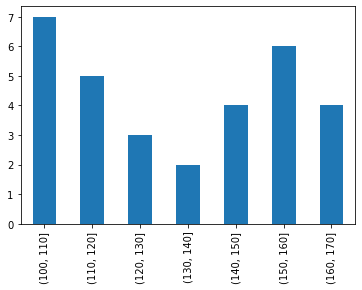

In [108]:
consumo_segmentos_count.sort_index().plot(kind='bar')

In [109]:
# Notamos que los datos de Year se encuentran como los índices del dataset
# Restablecemos el índica y hacemos que el índice anterior que correspondía a los años se agregue como columna
df_Continent_years = df_Continent.reset_index()

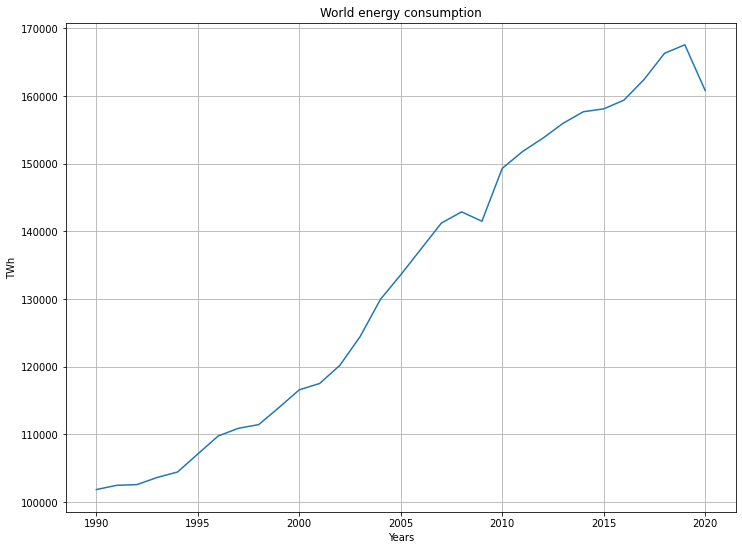

In [110]:
world_energy_consumption = df_Continent['World'].values
years = df_Continent_years['Year'].values

plt.figure(figsize=(12,9))
plt.plot(years,world_energy_consumption)
plt.xlabel('Years')
plt.ylabel('TWh')
plt.title('World energy consumption')
plt.grid(True)
plt.show()



Podemos ver claramente que el consumo energético en el mundo aumenta cada año. Pero notamos dos cambios abruptos cerca del 2008-2009 y 2020. Podríamos asociar estos cambios a:
- 2008-2009: Gran recesión o crisis económica iniciada en el 2008, pero que se evidenció en el 2009.
- 2019-2020: En Noviembre del 2019 se encontró el primer caso de Covid19 y en el 2020 se delcaró pandemia mundial.

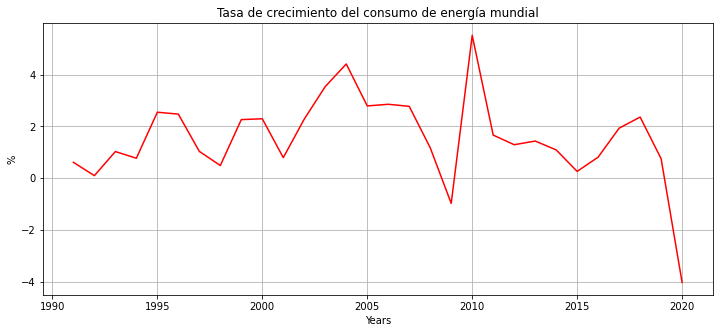

In [111]:
tasa_crecimiento = df_Continent['World'].pct_change().mul(100) 

plt.figure(figsize=(12,5))
plt.plot(years,tasa_crecimiento, 'r')
plt.xlabel('Years')
plt.ylabel('%')
plt.title('Tasa de crecimiento del consumo de energía mundial')
plt.grid(True)
plt.show()

In [112]:
profile = ppr.ProfileReport(df_Continent, title='Pandas Profiling Report', minimal=True)

In [113]:
profile.to_file('../data/reports/Continent_Consumption_TWH.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 500.27it/s]


# Preguntas de investigacion

1. ¿Qué países y organizaciones consumen más energía?
1. ¿Qué países han tenido mayor crecimiento en la demanda energética y cuáles han tenido disminuciones de demanda?
1. Cuales son las principales fuentes de generacion de energía de los países, continente, organización.
1. ¿Qué fuentes de energía renovable son las de mayor crecimiento?
1. ¿Qué países y organizaciones tienen fuentes de generación más limpias (Renvables o no Renovables)?

Ejes de exploración: Consumo, Fuentes, crecimiento

## Consumo energético

In [114]:
continentes = ['Year','Asia','Africa','Europe','North America','Latin America']
organization_name = ['Year','OECD','CIS','Middle-East','BRICS']

In [115]:
# Consumo energético por Organizaciones
df_org_cons = df_Continent_years[organization_name]
df_org_cons.head()

Year      OECD       CIS  Middle-East     BRICS
0  1990  52602.49  16049.40      2581.86  26621.07
1  1991  53207.25  15898.21      2744.68  26434.99
2  1992  53788.75  14339.79      3081.95  25993.05
3  1993  54614.48  13246.57      3349.44  26283.80
4  1994  55579.77  11606.74      3640.19  25993.05

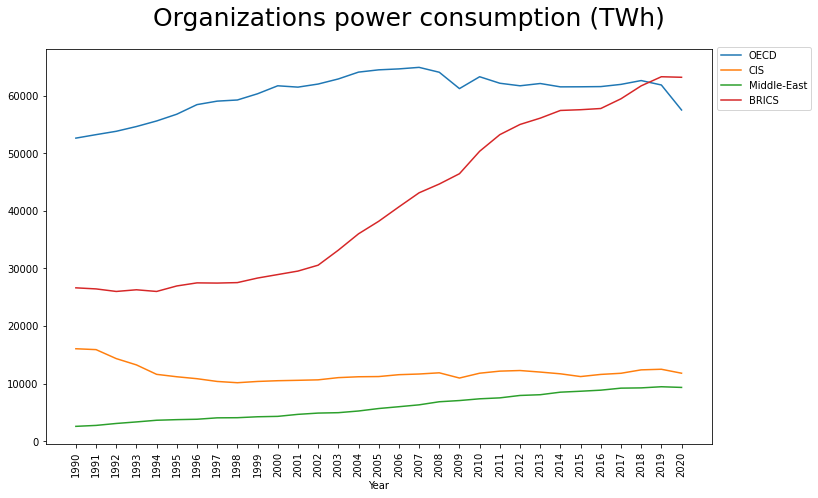

In [116]:
ax = df_org_cons.plot(x='Year',y=df_org_cons.columns[1:], figsize=(12,7))
fig = ax.get_figure()
ax.set_xticks(df_org_cons['Year'])
ax.tick_params(axis='x', rotation=90)
ax.legend(bbox_to_anchor=(1,1.02), loc='upper left')
fig.tight_layout(pad=3)
fig.suptitle('Organizations power consumption (TWh)', fontsize=25, y=1.02)

plt.show()

In [117]:
# Consumo energético por Continentes
df_cont_cons = df_Continent_years[continentes]
df_cont_cons.head()

Year      Asia   Africa    Europe  North America  Latin America
0  1990  24574.19  4407.77  20654.88       24667.23        5373.06
1  1991  24783.53  4535.70  20631.62       24841.68        5500.99
2  1992  25690.67  4582.22  20189.68       25341.77        5628.92
3  1993  26876.93  4721.78  20189.68       25830.23        5675.44
4  1994  28098.08  4803.19  20085.01       26365.21        5989.45

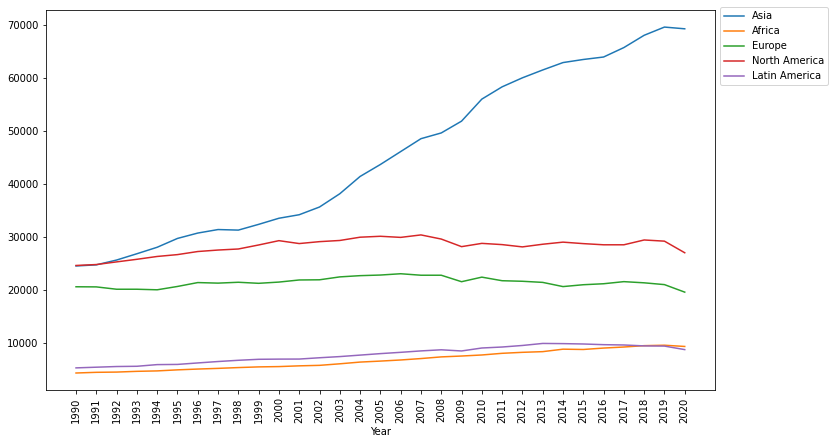

In [118]:
ax1 = df_cont_cons.plot(x='Year',y=df_cont_cons.columns[1:], figsize=(12,7))
fig = ax.get_figure()
ax1.set_xticks(df_org_cons['Year'])
ax1.tick_params(axis='x', rotation=90)
ax1.legend(bbox_to_anchor=(1,1.02), loc='upper left')
fig.tight_layout(pad=3)
fig.suptitle('Continents power consumption (TWh)', fontsize=25, y=1.02)

plt.show()

In [119]:
df_Country.head()

Year  China  United States  Brazil  Belgium  Czechia  France  Germany  \
0  1990.0  874.0         1910.0   141.0     48.0     50.0   225.0    351.0   
1  1991.0  848.0         1925.0   143.0     50.0     45.0   237.0    344.0   
2  1992.0  877.0         1964.0   145.0     51.0     44.0   234.0    338.0   
3  1993.0  929.0         1998.0   148.0     49.0     43.0   238.0    335.0   
4  1994.0  973.0         2036.0   156.0     52.0     41.0   231.0    333.0   

   Italy  Netherlands  ...  Australia  New Zealand  Algeria  Egypt  Nigeria  \
0  147.0         67.0  ...       86.0         14.0     22.0   33.0     66.0   
1  150.0         69.0  ...       85.0         14.0     23.0   33.0     70.0   
2  149.0         69.0  ...       87.0         14.0     24.0   34.0     72.0   
3  149.0         70.0  ...       91.0         15.0     24.0   35.0     74.0   
4  147.0         70.0  ...       91.0         15.0     23.0   34.0     72.0   

   South Africa  Iran  Kuwait  Saudi Arabia  United Arab Emirates  
0          90.0  69.0     9.0          58.0                  20.0  
1          92.0  77.0     3.0          68.0                  23.0  
2          88.0  81.0     9.0          77.0                  22.0  
3          94.0  87.0    12.0          80.0                  23.0  
4          98.0  97.0    14.0          84.0                  26.0  

[5 rows x 45 columns]

In [120]:
profile_countries = ppr.ProfileReport(df_Countries, title='Pandas Profiling Report', minimal=True)
profile_countries.to_file('../data/reports/Continent_Countries_TWH.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 250.17it/s]
